In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix,multilabel_confusion_matrix
from sklearn.metrics import classification_report,accuracy_score,f1_score,recall_score
from sklearn.metrics import roc_curve

#pip install plotly
import plotly.express as px

import warnings 
warnings.filterwarnings('ignore')
import pickle

In [2]:
df  = pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


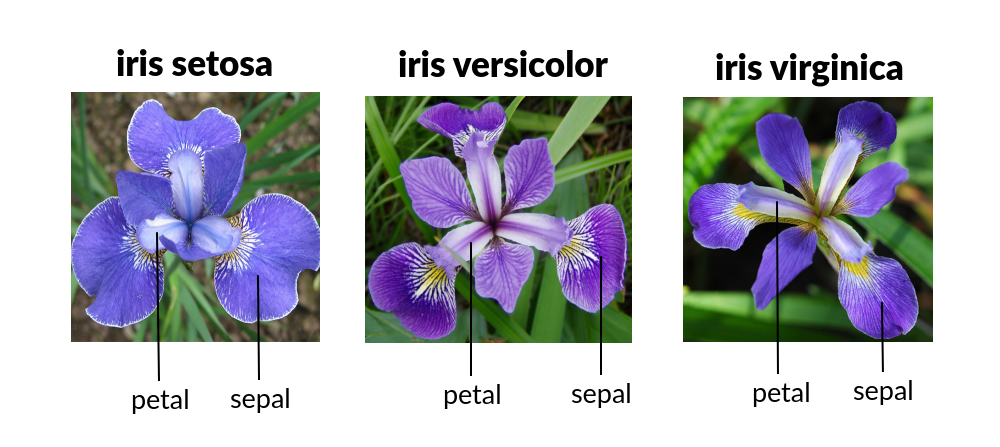

In [3]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [4]:
df.drop('Id',axis =1 ,inplace = True)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


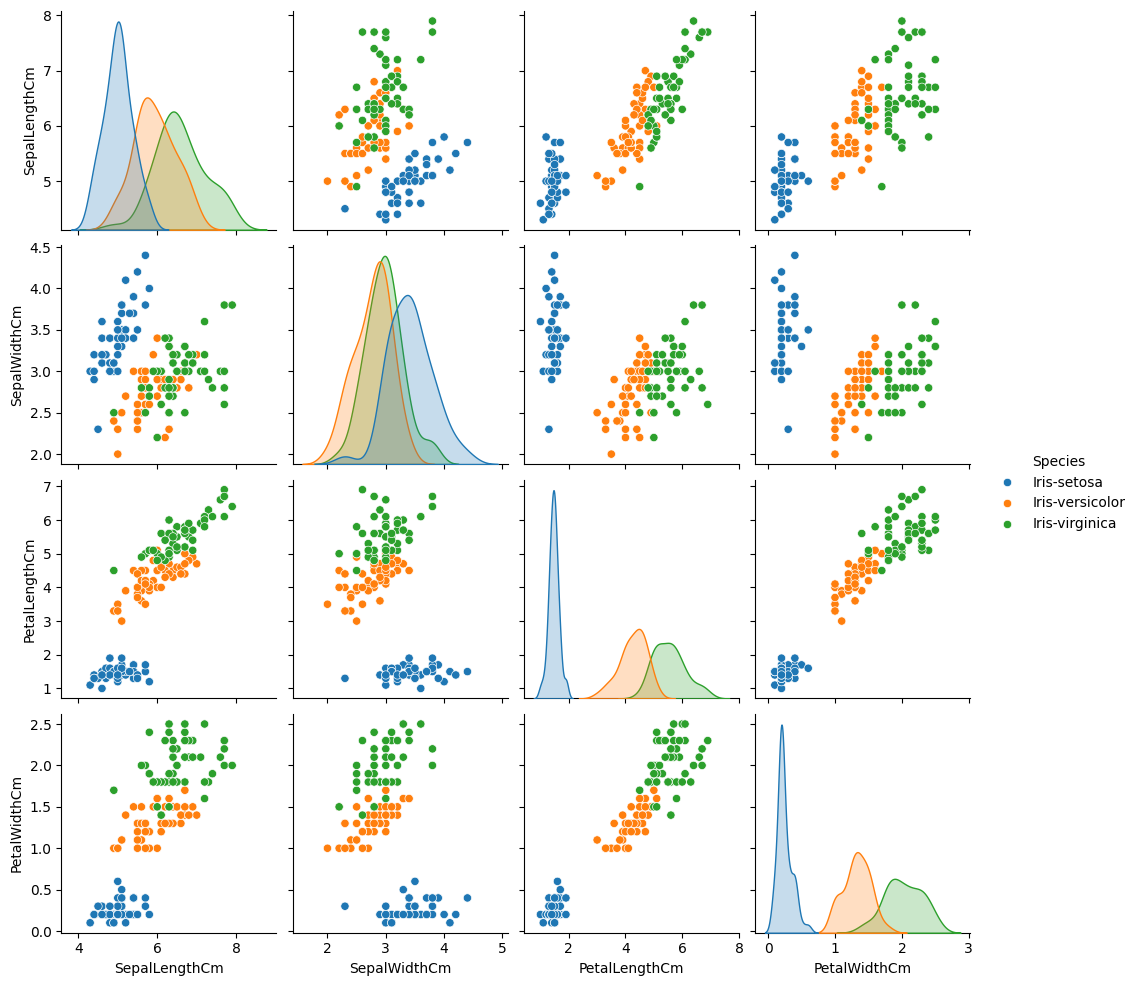

In [5]:
sns.pairplot(df,hue='Species')

In [6]:
px.scatter_3d(df,x='SepalLengthCm',y='SepalWidthCm',z = 'PetalLengthCm',color = 'Species')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
x = df.drop('Species',axis = 1)
y = df['Species']

In [9]:
y.value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=20,stratify=y)

In [11]:
x_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
92,5.8,2.6,4.0,1.2
0,5.1,3.5,1.4,0.2
27,5.2,3.5,1.5,0.2
37,4.9,3.1,1.5,0.1
16,5.4,3.9,1.3,0.4
...,...,...,...,...
30,4.8,3.1,1.6,0.2
2,4.7,3.2,1.3,0.2
139,6.9,3.1,5.4,2.1
91,6.1,3.0,4.6,1.4


In [12]:
y_train

92     Iris-versicolor
0          Iris-setosa
27         Iris-setosa
37         Iris-setosa
16         Iris-setosa
            ...       
30         Iris-setosa
2          Iris-setosa
139     Iris-virginica
91     Iris-versicolor
44         Iris-setosa
Name: Species, Length: 120, dtype: object

In [13]:
x_test

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
76,6.8,2.8,4.8,1.4
65,6.7,3.1,4.4,1.4
57,4.9,2.4,3.3,1.0
138,6.0,3.0,4.8,1.8
26,5.0,3.4,1.6,0.4
9,4.9,3.1,1.5,0.1
79,5.7,2.6,3.5,1.0
95,5.7,3.0,4.2,1.2
148,6.2,3.4,5.4,2.3
74,6.4,2.9,4.3,1.3


In [14]:
y_train.value_counts()

Species
Iris-versicolor    40
Iris-setosa        40
Iris-virginica     40
Name: count, dtype: int64

In [15]:
y_test

76     Iris-versicolor
65     Iris-versicolor
57     Iris-versicolor
138     Iris-virginica
26         Iris-setosa
9          Iris-setosa
79     Iris-versicolor
95     Iris-versicolor
148     Iris-virginica
74     Iris-versicolor
127     Iris-virginica
56     Iris-versicolor
109     Iris-virginica
28         Iris-setosa
112     Iris-virginica
131     Iris-virginica
35         Iris-setosa
20         Iris-setosa
31         Iris-setosa
64     Iris-versicolor
117     Iris-virginica
61     Iris-versicolor
48         Iris-setosa
11         Iris-setosa
22         Iris-setosa
114     Iris-virginica
68     Iris-versicolor
132     Iris-virginica
15         Iris-setosa
123     Iris-virginica
Name: Species, dtype: object

In [16]:
logistic_Clf = LogisticRegression(multi_class='ovr')
logistic_Clf.fit(x_train,y_train)

LogisticRegression(multi_class='ovr')

In [17]:
#Testing Data 

y_pred = logistic_Clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n",cnf_matrix)
print("*"*80)

accuracy = accuracy_score(y_test,y_pred)
print("Accuracy Score:",accuracy)
print("*"*80)

clf_report = classification_report(y_test,y_pred)
print("Classification report:\n",clf_report)

Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]
********************************************************************************
Accuracy Score: 0.9666666666666667
********************************************************************************
Classification report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [18]:
#Training Data 

y_pred_train = logistic_Clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix:\n",cnf_matrix)
print("*"*80)

accuracy = accuracy_score(y_train,y_pred_train)
print("Accuracy Score:",accuracy)
print("*"*80)

clf_report = classification_report(y_train,y_pred_train)
print("Classification report:\n",clf_report)

Confusion Matrix:
 [[40  0  0]
 [ 0 36  4]
 [ 0  2 38]]
********************************************************************************
Accuracy Score: 0.95
********************************************************************************
Classification report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        40
Iris-versicolor       0.95      0.90      0.92        40
 Iris-virginica       0.90      0.95      0.93        40

       accuracy                           0.95       120
      macro avg       0.95      0.95      0.95       120
   weighted avg       0.95      0.95      0.95       120



In [19]:
logistic_Clf.score(x_train,y_train)

0.95

In [20]:
with open('logistic_reg_model.pkl', 'wb') as f:
    pickle.dump(logistic_Clf , f)

In [21]:
1.Create Pickle File
2.Take Input from user
3.test_aray(2 dim)
4.Pass the test array to model

5. Go no new sheet import pickle file

SyntaxError: invalid decimal literal (618198766.py, line 1)

In [ ]:
input("Enter value of Sepellength")

Enter value of Sepellength 4.8


'4.8'

In [ ]:
# model testing

In [ ]:
import pickle
import  json
import numpy as np
import pandas as pd

In [ ]:
with open('logistic_reg_model.pkl','rb') as f:
    logistic_model = pickle.load(f)


logistic_model

LogisticRegression(multi_class='ovr')

In [ ]:
SepalLengthCm = 3.2
SepalWidthCm = 3.4
PetalLengthCm = 4.0
PetalWidthCm = 2.1

In [ ]:
fetaure_count = logistic_model.n_features_in_
fetaure_count

4

In [ ]:
test_array = np.zeros(fetaure_count)
test_array

array([0., 0., 0., 0.])

In [ ]:
flowerspieces = logistic_model.predict([test_array])[0]
print("Predicted flower spices is: ",flowerspieces)

Predicted flower spices is:  Iris-setosa
